# MY VIVNO PROJECT

In [1]:
#libries
!pip install plotly
!pip install seaborn
!pip install scikit-learn
!pip install catboost
!pip install numpy
!pip install pandas

     |████████████████████████████████| 15.6 MB 14.2 MB/s            
     |████████████████████████████████| 292 kB 13.1 MB/s            
     |████████████████████████████████| 22.2 MB 89.3 MB/s            ��███▌   | 19.8 MB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 309 kB 54.1 MB/s            
     |████████████████████████████████| 95.9 MB 441 bytes/s          ��██▉          | 65.5 MB 54.7 MB/s eta 0:00:01
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /home/docode/.pyenv/versions/3.6.7/bin/python3.6 /home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/pip install --ignore-installed --no-user --prefix /tmp/pip-build-env-2h8h3b_m/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- 'setuptools >= 64.0' wheel jupyterlab 'conan (>=1.57, <=1.59)'
       cwd: None
  Complete output (2 lines):
  ERROR: Could not find a version that satisfies the require

     |████████████████████████████████| 76.6 MB 11 kB/s                |██▉                             | 6.7 MB 3.2 MB/s eta 0:00:22 |███████████████████████████████▉| 76.1 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 4.4 MB/s             


In [2]:
!pip install lightgbm

     |████████████████████████████████| 3.0 MB 17.3 MB/s            


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor  # Import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
from sklearn import svm
from pandas.plotting import scatter_matrix

sns.set()


# COLLECTING, CLEANING, EXPLORING OF DATA

In [4]:
my_wine_data = pd.read_csv("Vivino_dataset.csv")
my_wine_data_head = my_wine_data.head(15)
print(my_wine_data_head.to_string(index=False))

 Unnamed: 0                                              Name      Country               Region                    Winery  Rating  NumberOfRatings   Price  Year Style
          0                                      Pomerol 2011       France              Pomerol     Château La Providence     4.2              100   95.00  2011   red
          1                                        Lirac 2017       France                Lirac        Château Mont-Redon     4.3              100   15.50  2017   red
          2                Erta e China Rosso di Toscana 2015        Italy              Toscana                Renzo Masi     3.9              100    7.45  2015   red
          3                                    Bardolino 2019        Italy            Bardolino                Cavalchina     3.5              100    8.72  2019   red
          4                    Ried Scheibner Pinot Noir 2016      Austria            Carnuntum               Markowitsch     3.9              100   29.15  2016   re

In [5]:
my_wine_data_tail = my_wine_data.tail()
print(my_wine_data_tail.to_string(index=False))

 Unnamed: 0                        Name   Country             Region             Winery  Rating  NumberOfRatings  Price  Year Style
      13829    Côte des Roses Rosé 2019    France          Languedoc    Gérard Bertrand     3.9             1750   9.36  2019  rose
      13830                 M Rosé 2019    France  Côtes de Provence             Minuty     4.0             2046  12.85  2019  rose
      13831  Whispering Angel Rosé 2019    France  Côtes de Provence  Château d'Esclans     4.2             2990  16.47  2019  rose
      13832       Vinho Verde Rosé N.V.  Portugal        Vinho Verde       Casal Garcia     3.5             9493   4.35  N.V.  rose
      13833      The Original Rosé N.V.  Portugal              Douro             Mateus     3.6            29531   5.99  N.V.  rose


In [6]:
data_shape = my_wine_data.shape

print("Number of rows:", data_shape[0])
print("Number of columns:", data_shape[1])

Number of rows: 13834
Number of columns: 10


In [7]:
data_description = my_wine_data.describe()
print(data_description)

         Unnamed: 0        Rating  NumberOfRatings         Price
count  13834.000000  13834.000000     13834.000000  13834.000000
mean    6916.500000      3.865664       428.322466     33.024850
std     3993.676147      0.296427      1838.413812     70.899893
min        0.000000      2.200000        25.000000      3.150000
25%     3458.250000      3.700000        56.000000      9.902500
50%     6916.500000      3.900000       129.000000     15.950000
75%    10374.750000      4.100000       336.000000     32.500000
max    13833.000000      4.900000     94287.000000   3410.790000


In [8]:
data_info = my_wine_data.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       13834 non-null  int64  
 1   Name             13834 non-null  object 
 2   Country          13834 non-null  object 
 3   Region           13834 non-null  object 
 4   Winery           13834 non-null  object 
 5   Rating           13834 non-null  float64
 6   NumberOfRatings  13834 non-null  int64  
 7   Price            13834 non-null  float64
 8   Year             13834 non-null  object 
 9   Style            13834 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.1+ MB
None


NOW CLEANING AND FINDING MISSING VALUSES

In [10]:
def my_data_clean(wine_data):
    wine_data = wine_data.drop(["Name", "Unnamed: 0"], axis=1)
    
    # Convert 'Year' column values to integers, replacing 'N.V.' with 2021
    wine_data['Year'] = wine_data['Year'].replace('N.V.', 2021).astype(int)
    
    # Check for missing values
    columns_with_missing = wine_data.columns[wine_data.isnull().any()]
    if len(columns_with_missing) > 0:
        print("Columns with missing values:")
        print(columns_with_missing)
        
        # Calculate and show (%) for missing values if any
        missing_percentage = (wine_data[columns_with_missing].isnull().sum() / wine_data.shape[0]) * 100
        print("Missing value percentages:")
        print(missing_percentage)
    
    # Display cleaned data
    print("Cleaned data:")
    print(wine_data.to_string(index=False))
    
    return wine_data

# Call the function
cleaned_wine_data = my_data_clean(my_wine_data)


Cleaned data:
        Country                                           Region                                                  Winery  Rating  NumberOfRatings    Price  Year      Style
         France                                          Pomerol                                   Château La Providence     4.2              100    95.00  2011        red
         France                                            Lirac                                      Château Mont-Redon     4.3              100    15.50  2017        red
          Italy                                          Toscana                                              Renzo Masi     3.9              100     7.45  2015        red
          Italy                                        Bardolino                                              Cavalchina     3.5              100     8.72  2019        red
        Austria                                        Carnuntum                                             Markowitsch     3

# VISUALIZATION OF DATA

DISTRIBUTION OF WINE 

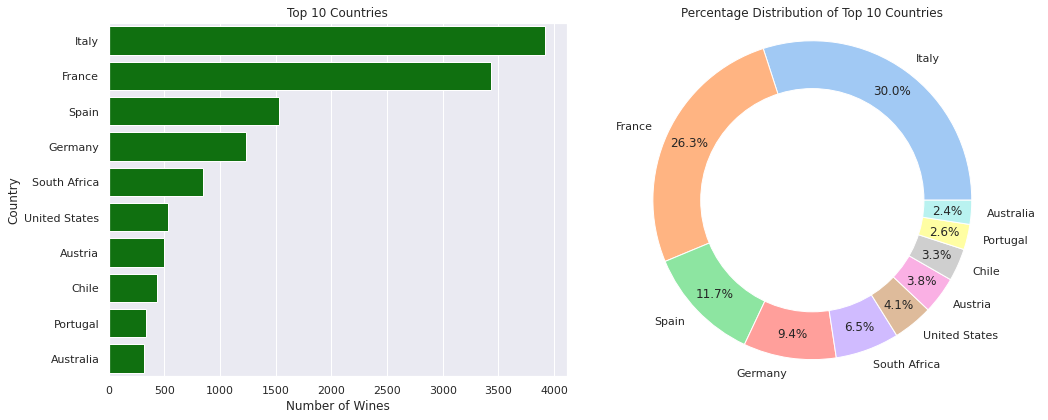

In [11]:
def plot_country_distribution(wines):
    # Top 10 countries
    country_counts = wines['Country'].value_counts().head(10)
    
    # Creategrid of 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Horizontal bar plot on the left subplot
    sns.barplot(x=country_counts.values, y=country_counts.index, ax=axes[0], color='green')
    axes[0].set_title("Top 10 Countries")
    axes[0].set_xlabel("Number of Wines")
    axes[0].set_ylabel("Country")
    
    # Donut plot on the right subplot
    wedges, texts, autotexts = axes[1].pie(country_counts, labels=country_counts.index, 
                                            autopct='%1.1f%%', pctdistance=0.85,
                                            wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
                                            colors=sns.color_palette("pastel"))
    axes[1].set_title("Percentage Distribution of Top 10 Countries")
    
    #circle at the center to create a donut effect
    center_circle = plt.Circle((0,0),0.70,fc='white')
    axes[1].add_artist(center_circle)
    
    # Equal aspect ratio ensures that the pie is drawn as a circle.
    plt.axis('equal')  
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Call function
plot_country_distribution(my_wine_data)


RATING

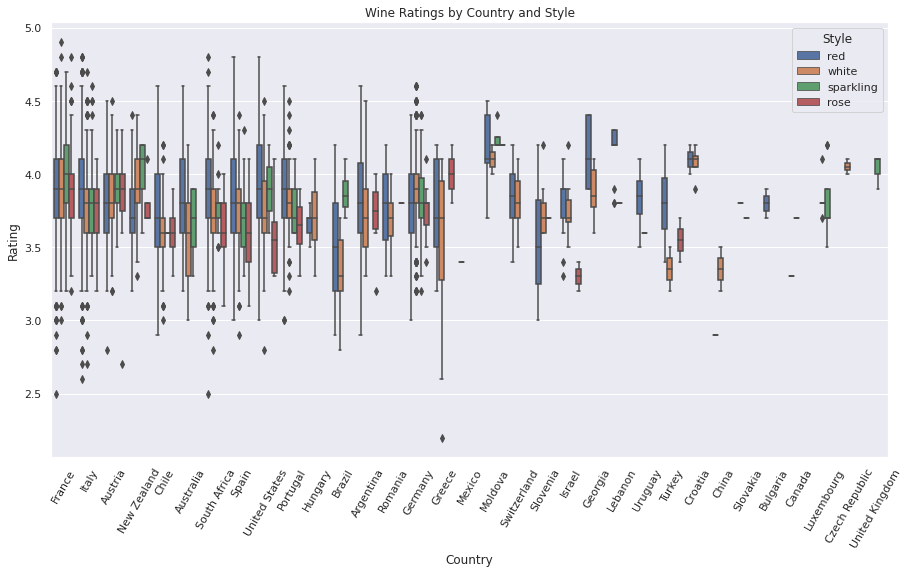

In [13]:
def _rating_by_country_(wine_data):
    plt.figure(figsize=(15, 8))
    sns.boxplot(x="Country", y="Rating", hue="Style", data=wine_data)
    plt.xticks(rotation=60)
    plt.title("Wine Ratings by Country and Style")
    plt.xlabel("Country")
    plt.ylabel("Rating")
    plt.legend(title="Style")
    plt.show()

# Call the 
_rating_by_country_(my_wine_data)

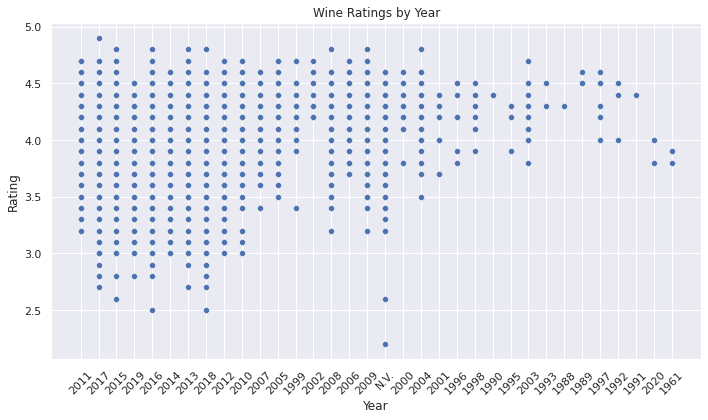

In [14]:
def visualize_rating_by_year(wine_data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Year', y='Rating', data=wine_data)  
    plt.xlabel('Year')
    plt.ylabel('Rating')
    plt.title('Wine Ratings by Year')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call
visualize_rating_by_year(my_wine_data)

WINE PRICE BY YEAR

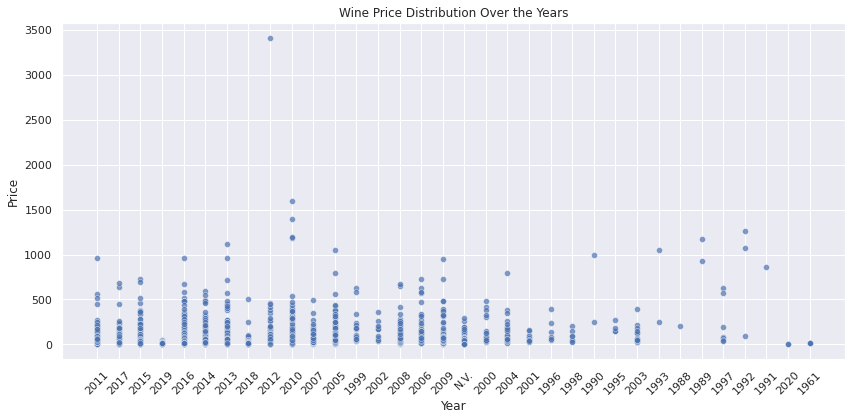

In [15]:
def visualize_year_price_distribution(data):
    sns.set_style('darkgrid')
    
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Year', y='Price', data=data, alpha=0.7)
    
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.title('Wine Price Distribution Over the Years')
    
    plt.xticks(rotation=45)  # Rotate x-axis labels for  visibility
    plt.tight_layout()
    plt.show()

# 
visualize_year_price_distribution(my_wine_data)  


In [17]:
def preprocess_and_encode(data):
    # Encode categorical columns using one-hot encoding
    encoded_data = pd.get_dummies(data, columns=['Style'])
    
    # 
    categorical_cols = [col for col in encoded_data.columns if encoded_data[col].dtype == "object"]
    
    # Initialize label encoder
    label_encoder = preprocessing.LabelEncoder()
    
    # Apply label encoding to categorical columns
    for col in categorical_cols:
        encoded_data[col] = label_encoder.fit_transform(encoded_data[col])
    
    return encoded_data

# Process and encode the data
processed_data = preprocess_and_encode(my_wine_data)

#
print(processed_data)


       Unnamed: 0   Name  Country  Region  Winery  Rating  NumberOfRatings  \
0               0   7343       10     574     791     4.2              100   
1               1   5677       10     404     891     4.3              100   
2               2   3457       16     748    2809     3.9              100   
3               3    753       16      61     559     3.5              100   
4               4   7992        2     143    2289     3.9              100   
...           ...    ...      ...     ...     ...     ...              ...   
13829       13829   2892       10     393    1823     3.9             1750   
13830       13830   5818       10     267    2394     4.0             2046   
13831       13831  10766       10     267    1024     4.2             2990   
13832       13832  10524       22     809     509     3.5             9493   
13833       13833   9804       22     291    2346     3.6            29531   

       Price  Year  Style_red  Style_rose  Style_sparkling  Sty

<Figure size 1080x720 with 0 Axes>

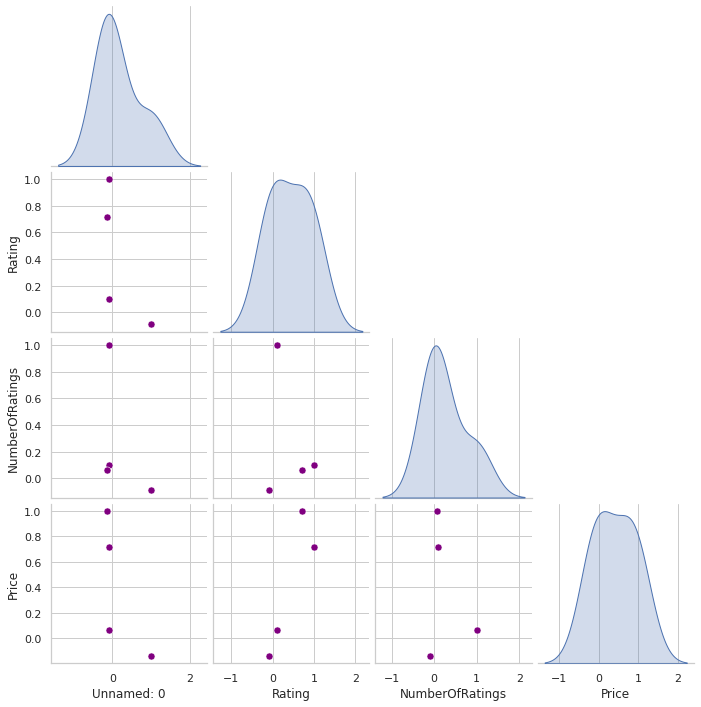

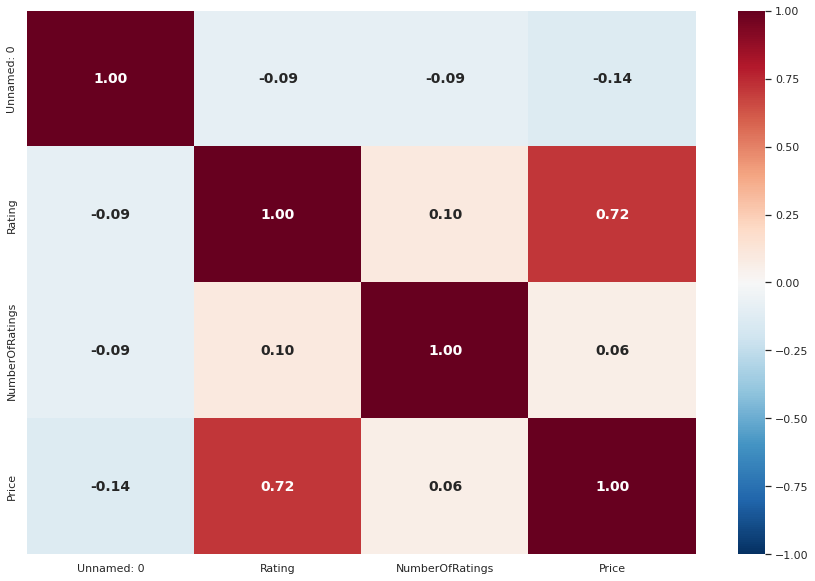

In [18]:
def visualize_correlation_analysis(data):
    sns.set_style('whitegrid')  # Set style to whitegrid
    wine_correlations = data.corr(method='spearman')  # Use Spearman correlation
    
    # Scatterplot matrix
    plt.figure(figsize=(15, 10))
    sns.pairplot(wine_correlations, diag_kind='kde', corner=True, plot_kws={'marker': 'o', 's': 50, 'color': 'purple'})  # Use circle markers
    plt.show()
    
    # Diverging correlation heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(wine_correlations, vmin=-1, vmax=1, center=0, cmap='RdBu_r', annot=True, fmt='.2f', annot_kws={'size': 14, 'weight': 'bold'})  # Use 'RdBu_r' colormap
    plt.show()

# Call the function with 'my_wine_data'
visualize_correlation_analysis(my_wine_data)


# ML

In [19]:
def predict_prices(data):
    # Preprocess 'Year'
    data['Year'] = data['Year'].replace('N.V.', 2021)
    data['Year'] = data['Year'].astype(int)
    
    # Prepare features and target
    X = data[['Rating', 'NumberOfRatings', 'Price', 'Year']]
    y = data['Price']
    
    # Split data
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
    
    # Train model
    model = LGBMRegressor(n_estimators=1000)
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    
    # Create result DataFrame
    predictions_df = x_test.copy()
    predictions_df['Actual'] = y_test
    predictions_df['Predicted'] = y_pred
    predictions_df['Accuracy'] = round(r2_score(y_test, y_pred) * 100, 2)
    
    return predictions_df

# Call the function and display results
predictions_df = predict_prices(my_wine_data)
print(predictions_df)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 11067, number of used features: 4
[LightGBM] [Info] Start training from score 33.447921
       Rating  NumberOfRatings  Price  Year  Actual  Predicted  Accuracy
9154      3.9               33  19.65  2018   19.65  19.559260     89.02
8958      4.3               30  48.43  2011   48.43  47.833872     89.02
11433     3.8              165  23.00  2011   23.00  22.870686     89.02
6621      3.8               59  69.00  2003   69.00  70.860903     89.02
4296      3.9               34  16.95  2015   16.95  16.951913     89.02
...       ...              ...    ...   ...     ...        ...       ...
13659     3.9               84   5.70  2019    5.70   5.638269     89.02
9559      4.3               42  84.00  2016   84.00  84.982194     89.02

the end :)